# Zadanie (przedziały ufności)

Z populacji włókien bawełny pobrano $300$--elementową próbkę włókien i zmierzono ich długości. Obliczono 

$$
\bar X = 27.43 \mbox{ oraz } S^{*2} =51.598.
$$ 

Znaleźć $95\%$ realizacje przedziału ufności dla nieznanej wartości.  

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy import integrate

Przedział ufności dla <b>nieznanej wartości przeciętnej $\mu$</b> populacji, w której </b>badana cecha ma rozkład $N(\mu,\sigma^2)$</b>, w przypadku gdy <b>zarówno $\mu$ jak $\sigma$ są nieznane</b>, na podstawie $n$--elementowej próby $X_1,\ldots,X_n$ <b>($n
\geq100$)</b> wynosi

$$
\left(
\bar X - u \left(1-\frac{\alpha}{2} \right) \frac{S^{*}}{\sqrt{n}},
\bar X + u \left(1-\frac{\alpha}{2} \right) \frac{S^{*}}{\sqrt{n}}
\right)
$$

gdzie $u(\alpha)$ oznacza kwantyl rzędu $\alpha$ rozkładu normalnego $N(0,1)$ oraz

$$
S^{*2} = \frac{1}{n-1} \sum_{i=1}^{n} (X_{i} - \bar X).
$$

## Zdefiniujmy zmienną losową

In [2]:
n=300
(mu, sigma)=(0,1)
X=stats.norm(mu, sigma)

## Wylicz końce przedziałów

In [3]:
alpha=0.05
bar_x = 27.43
s = np.sqrt(51.598)
print(bar_x)
print(s)

27.43
7.18317478557


In [4]:
L=bar_x-X.ppf(1-alpha/2)*(s/np.sqrt(n))

In [5]:
R=bar_x+X.ppf(1-alpha/2)*(s/np.sqrt(n))

## Wypisz przedział ufności

In [6]:
print(r'( %3.5f , %3.5f)' % (L,R))

( 26.61716 , 28.24284)


# Zadanie 2
Wykonaj zadanie za pomocą <tt>scipy</tt> i <tt>funkcji stats.norm.interval</tt>.

In [13]:
ci = stats.norm.interval(1-alpha, loc=bar_x, scale=s/np.sqrt(n))
ci

(26.617162188727715, 28.242837811272285)

# Zadanie 3
Narysuj przedział ufności na wykresie gęstości i dystrybuanty rozkładu statystyki
$$
U = \frac{\sqrt{n}(\bar X - \mu)}{S^{*}}
$$

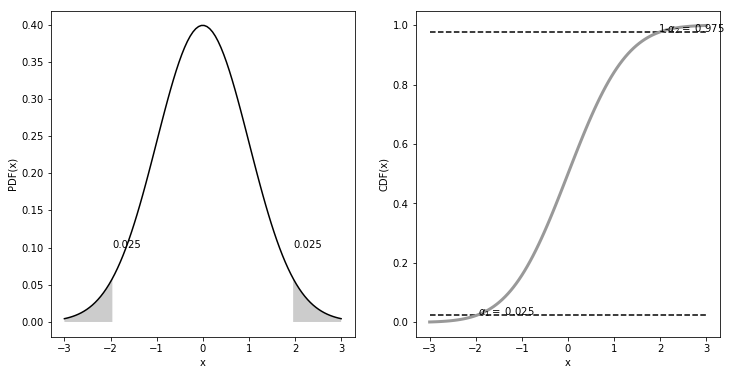

In [7]:
alpha_1=alpha/2
alpha_2=alpha-alpha_1

u_1=X.ppf(alpha_1)
u_2=X.ppf(1-alpha_2)

x = np.linspace(-3,3,100)
yp = X.pdf(x)
y = X.cdf(x)
x1 = np.linspace(-3, u_1)
y1 = X.pdf(x1)

x2 = np.linspace(u_2,3)
y2 = X.pdf(x2)

figs, axs = plt.subplots(1,2, figsize=(12, 6))

axs[0].plot(x,yp, 'k')
axs[0].fill_between(x1, y1, facecolor='#CCCCCC')
axs[0].fill_between(x2, y2, facecolor='#CCCCCC')
axs[0].text(u_1, 0.1, np.round(X.cdf(u_1),4))
axs[0].text(u_2, 0.1, np.round(1-X.cdf(u_2),4))
axs[0].set_xlabel('x')
axs[0].set_ylabel('PDF(x)')

axs[1].plot(x, y, '#999999', lw=3)
axs[1].set_xlabel('x')
axs[1].set_ylabel('CDF(x)')
axs[1].text(u_1, X.cdf(u_1), r'$\alpha_1 = $ %.3f' % np.round(alpha_1,3))
axs[1].hlines(alpha_1, -3, 3, linestyles='--')
axs[1].text(u_2, X.cdf(u_2), r'1-$\alpha_2 = $ %.3f' % np.round(1-alpha_2,3))
axs[1].hlines(1-alpha_2, -3, 3, linestyles='--')
plt.show()